# 'Netflix' dataset EDA

## Setup

In [1]:
import os

# Actual directory
os.getcwd()

'C:\\Users\\Ospite\\Desktop\\Portfolio\\Portfolio-Projects-main\\2. Netflix movies'

In [2]:
# Files within the directory
os.listdir()

['.ipynb_checkpoints',
 'boceto (1).ipynb',
 'Build the DataFrame.ipynb',
 'Cartel1.csv',
 'data',
 'Download data from TMDB.ipynb',
 'final_netflix_df_clean.xlsx',
 'Followers scraping.ipynb',
 'function_1.py',
 'function_2.py',
 'movie_pipeline',
 'Netflix EDA.ipynb',
 'prova.csv',
 'README',
 'utils.py',
 '__pycache__']

In [3]:
# Change the directory (if necessary)
#os.chdir("/PATH/TO/NEW/DIRECTORY")

In [4]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Import the dataset
df = pd.read_excel('final_netflix_df_clean.xlsx')
df.sample(10)

,tmdb_id,imdb_id,title,original_title,premiere,year,month,year/month,weekday,language,...,director,male_actors,female_actors,total_actors,gender_difference,vote_count,vote_average,followers,imdb_score,score_rolling_average
345,567970,tt3111426,Lost Girls,Lost Girls,2020-03-13,2020,march,2020-03-01,Friday,English,...,['Liz Garbus'],9,9,18,0.0,518,6.1,442680,6.1,6.35
550,699102,tt11388278,A Week Away,A Week Away,2021-03-26,2021,march,2021-03-01,Friday,English,...,['Roman White'],2,3,5,-1.0,264,7.1,1110000,5.7,6.36
127,515333,tt5580392,Amateur,Amateur,2018-04-06,2018,april,2018-04-01,Friday,English,...,['Ryan Koo'],5,1,6,4.0,225,6.5,397242,5.9,5.97
1,261039,tt3692768,"The Other One: The Long, Strange Trip of Bob Weir","The Other One: The Long, Strange Trip of Bob Weir",2015-05-22,2015,may,2015-05-01,Friday,English,...,['Mike Fleiss'],1,0,1,1.0,18,7.3,365000,7.3,NaN
411,645489,tt10350626,Gunjan Saxena: The Kargil Girl,गुंजन सक्सेना: द कारगिल गर्ल,2020-08-12,2020,august,2020-08-01,Wednesday,Hindi,...,['Sharan Sharma'],3,2,5,1.0,49,7.5,731848,5.3,6.14
17,376426,tt5151716,Tony Robbins: I Am Not Your Guru,Tony Robbins: I Am Not Your Guru,2016-07-15,2016,july,2016-07-01,Friday,English,...,['Joe Berlinger'],1,0,1,1.0,91,6.6,0,6.7,6.19
15,318121,tt2452386,The Fundamentals of Caring,The Fundamentals of Caring,2016-06-24,2016,june,2016-06-01,Friday,English,...,['Rob Burnett'],10,8,18,2.0,1800,7.3,7892,7.3,6.57
235,596204,tt10050766,Brené Brown: The Call to Courage,Brené Brown: The Call to Courage,2019-04-19,2019,april,2019-04-01,Friday,English,...,['Sandra Restrepo'],0,1,1,-1.0,31,7.0,0,7.7,6.33
254,606215,tt10289996,The Black Godfather,The Black Godfather,2019-06-07,2019,june,2019-06-01,Friday,English,...,['Reginald Hudlin'],14,1,15,13.0,23,6.9,940513,7.4,6.34
257,514999,tt1618434,Murder Mystery,Murder Mystery,2019-06-14,2019,june,2019-06-01,Friday,English,...,['Kyle Newacheck'],21,15,36,6.0,3042,6.3,518,6.0,6.33


In [6]:
print('The number of original Netflix films is: ', df.shape[0])

The number of original Netflix films is:  684


## Business Questions

#### 1) What are the characteristics of the highest rated movies?
#### 2) At what time of the year, month or week are the movies released?
#### 3) Is Netflix releasing the highest rated movies at the times when people would watch them the most? 
#### 4) How does the popularity of the actors influence the criticism of the movies?
#### 5) Is the rating of films improving as the number of their own productions increases?
#### 6) Is netflix increasing their investing in new movies?
#### 7) Which genres have the best rating score?

## Univariate exploratory data analysis

### 1. Column "IMBD Score": summarizing the rating score

In [7]:
df['imdb_score'].describe()

count    684.000000
mean       6.206579
std        0.997317
min        2.500000
25%        5.600000
50%        6.300000
75%        6.900000
max        9.000000
Name: imdb_score, dtype: float64

- The score mean is about 6.21 with a standard deviation of 1. 
- The median (50th percentile) matches aprox. with the mean, so we do not have extremely low or extremely high values respect to the mean (we suspect that it happens because the score range is quite limited). 
- The score values do not reach their limits: the maximum value is 9 and the minimum value is 2.5

Text(4.5, 140, 'Mean = 6.21')

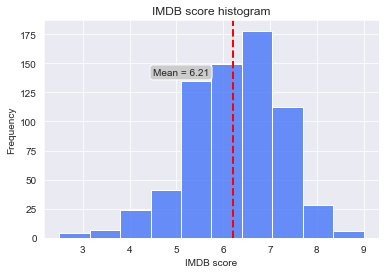

In [16]:
# Histogram
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.histplot(x=df['imdb_score'], bins=10, data=df)
plt.title("IMDB score histogram")
plt.xlabel("IMDB score")
plt.ylabel("Frequency")
plt.axvline(df['imdb_score'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate((f"Mean = {round(df['imdb_score'].mean(), 2)}"), 
             xy =(4.5, 140),
             xytext =(4.5, 140),
             bbox = dict(boxstyle ="round", fc ="0.8"))

- The distribution seems normal with a smooth left skewness

Text(4.5, 0.8, 'Media = 6.21')

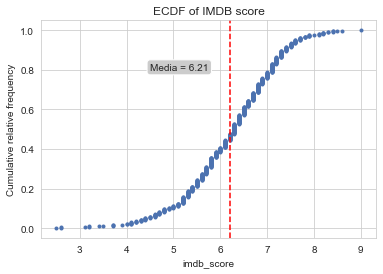

In [14]:
# ECDF: shows what is the probability of obtaining a value less than or equal to 'x'
def ecdf(data, column):
    """Calculates a ECDF for a one-dimensional array of measures."""
    # Total number of points: n
    n = len(data[column])

    # x-data for the ECDF: x
    x = np.sort(data[column])

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    plt.plot(x, y, marker='.', linestyle = 'none')
    plt.title(f"ECDF of {column}")
    plt.xlabel(f'{column}')
    plt.ylabel(f'Cumulative relative frequency')

ecdf(df, 'imdb_score')
plt.title("ECDF of IMDB score")
plt.axvline(df['imdb_score'].mean(), color='r', linestyle='dashed', linewidth=1.5)
plt.annotate((f"Media = {round(df['imdb_score'].mean(), 2)}"), 
             xy =(4.5, 0.8),
             xytext =(4.5, 0.8),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- Just a 20% de films scored more than 7 
- Just a 10% of films scored more than 8
- Just a 15% of films scored less than 5
- Between 5.5 and 7 we have the 60% of califications

### 2. Column "Runtime"

In [15]:
df['runtime'].describe()

count    684.000000
mean      94.122807
std       26.818289
min        4.000000
25%       87.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: runtime, dtype: float64

- The mean is about 94 minutes with a standard deviation of 26.82 minutes
- The median mathces aprox. with the mean so we do not have have extremely low or extremely high values respect to the mean.
- The extreme values are 4 and 209 minutes

Text(20, 140, 'Media = 94.12')

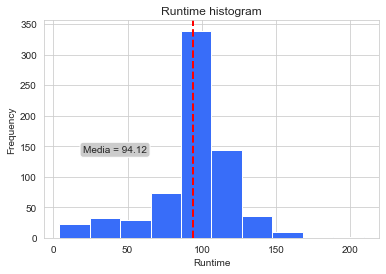

In [18]:
# Histogram
sns.set_style("whitegrid")
sns.set_palette("rainbow")
plt.hist(x=df['runtime'], bins=10)
plt.title("Runtime histogram")
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.axvline(df['runtime'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate((f"Media = {round(df['runtime'].mean(), 2)}"), 
             xy =(20, 140),
             xytext =(20, 140),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- The distribution has a big ammount of values concentrated around the mean

Text(20, 0.8, 'Mean = 94.12')

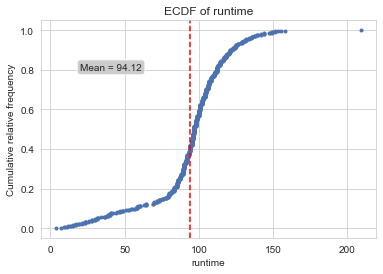

In [19]:
# ECDF
ecdf(df, 'runtime')
plt.axvline(df['runtime'].mean(), color='r', linestyle='dashed', linewidth=1.5)
plt.annotate((f"Mean = {round(df['runtime'].mean(), 2)}"), 
             xy =(20, 0.8),
             xytext =(20, 0.8),
            bbox = dict(boxstyle ="round", fc ="0.8"))

- Aprox. 60% of the cases are above the mean, so we have some cases extremely low (short films). 
- Aprox. a 20% of films last less than 1 hour (documentaries and short films).
- Aprox. a 20% of films last more than 2 hours.

### 3. Column "Year": is Netflix increasing its productions?

In [57]:
df['Year'].value_counts()

2020    147
2019     89
2018     80
2021     60
2017     45
2016     21
2015      7
2014      1
Name: Year, dtype: int64

Text(0.5, 1.0, 'Films by year')

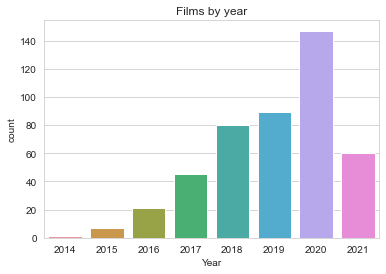

In [58]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='Year',data=df)
plt.title('Films by year')

- The number of new films per year is growing steadily.

In [59]:
films_by_year = df.groupby('Year')['Title'].count()
df_films_by_year = pd.DataFrame(films_by_year)
df_films_by_year.reset_index(inplace=True)
df_films_by_year['Rolling growth (%)'] = df_films_by_year['Title']\
    .rolling(window=2).apply(lambda x: round(((x.iloc[1]-x.iloc[0])*100)/x.iloc[0],2))
df_films_by_year

,Year,Title,Rolling growth (%)
0,2014,1,NaN
1,2015,7,600.00
2,2016,21,200.00
3,2017,45,114.29
4,2018,80,77.78
5,2019,89,11.25
6,2020,147,65.17
7,2021,60,-59.18


- In relative terms, only in the 2020 Netflix incremented porcentually the production of new content. We see then a strong investment in own content.

### 4. Column "Month"

In [60]:
df['Month'].value_counts()

10    63
4     54
11    42
9     42
5     38
3     35
12    34
2     33
6     29
7     28
8     26
1     26
Name: Month, dtype: int64

Text(0.5, 1.0, 'Films by month')

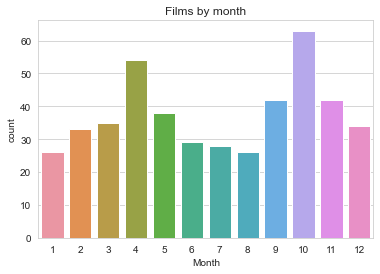

In [61]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='Month', data=df, order=range(1, 13))
plt.title('Films by month')

- The largest number of premieres coincides with the fall / winter months of the global north. Hypothetically, it could be the result of users spending more time at home with less social activity
- The other peak occurs in spring (April more precisely)

### 5. Column "Weekday"

In [62]:
df['Weekday'].value_counts()

Friday       303
Wednesday     64
Thursday      44
Tuesday       18
Monday        13
Sunday         5
Saturday       3
Name: Weekday, dtype: int64

Text(0.5, 1.0, 'Films by weekday')

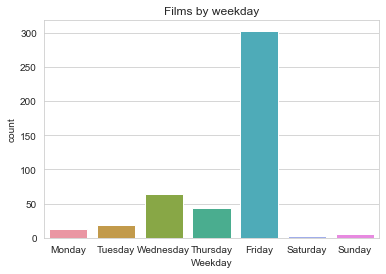

In [63]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.countplot(x='Weekday', data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title('Films by weekday')

- Almost all films are relased on friday.
- Few films are released on weekends (only 14).

### 6. Column "Followers": how many followers have the main actors of every movie?

In [64]:
df["Followers"].describe()

count    4.500000e+02
mean     6.420022e+06
std      1.273263e+07
min      0.000000e+00
25%      1.219662e+05
50%      9.818075e+05
75%      5.910228e+06
max      1.005154e+08
Name: Followers, dtype: float64

Text(20, 0.8, 'Media = 6420021.86')

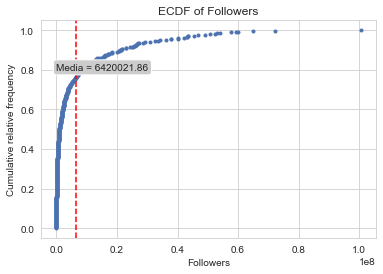

In [65]:
# ECDF
ecdf(df, 'Followers')
plt.axvline(df['Followers'].mean(), color='r', linestyle='dashed', linewidth=1.5)
plt.annotate((f"Media = {round(df['Followers'].mean(), 2)}"), 
             xy =(20, 0.8),
             xytext =(20, 0.8),
            bbox = dict(boxstyle ="round", fc ="0.8"))

## Bivariate analysis

In [36]:
# Refresh the DataFrame
df.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year,Month,Year/Month,Weekday,IMDB Score rolling average
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,2019-08-01,Monday,NaN
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,2020-08-01,Friday,NaN
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,2019-12-01,Thursday,NaN
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,2018-01-01,Friday,NaN
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,2020-10-01,Friday,NaN


### 1. "Genre" and "IMDB Score": which genres have the best rating scores?

In [37]:
print("The number of genres is: ", len(df["Genre"].unique()))

The number of genres is:  115


Text(0.5, 1.0, 'Boxplot rating by genre')

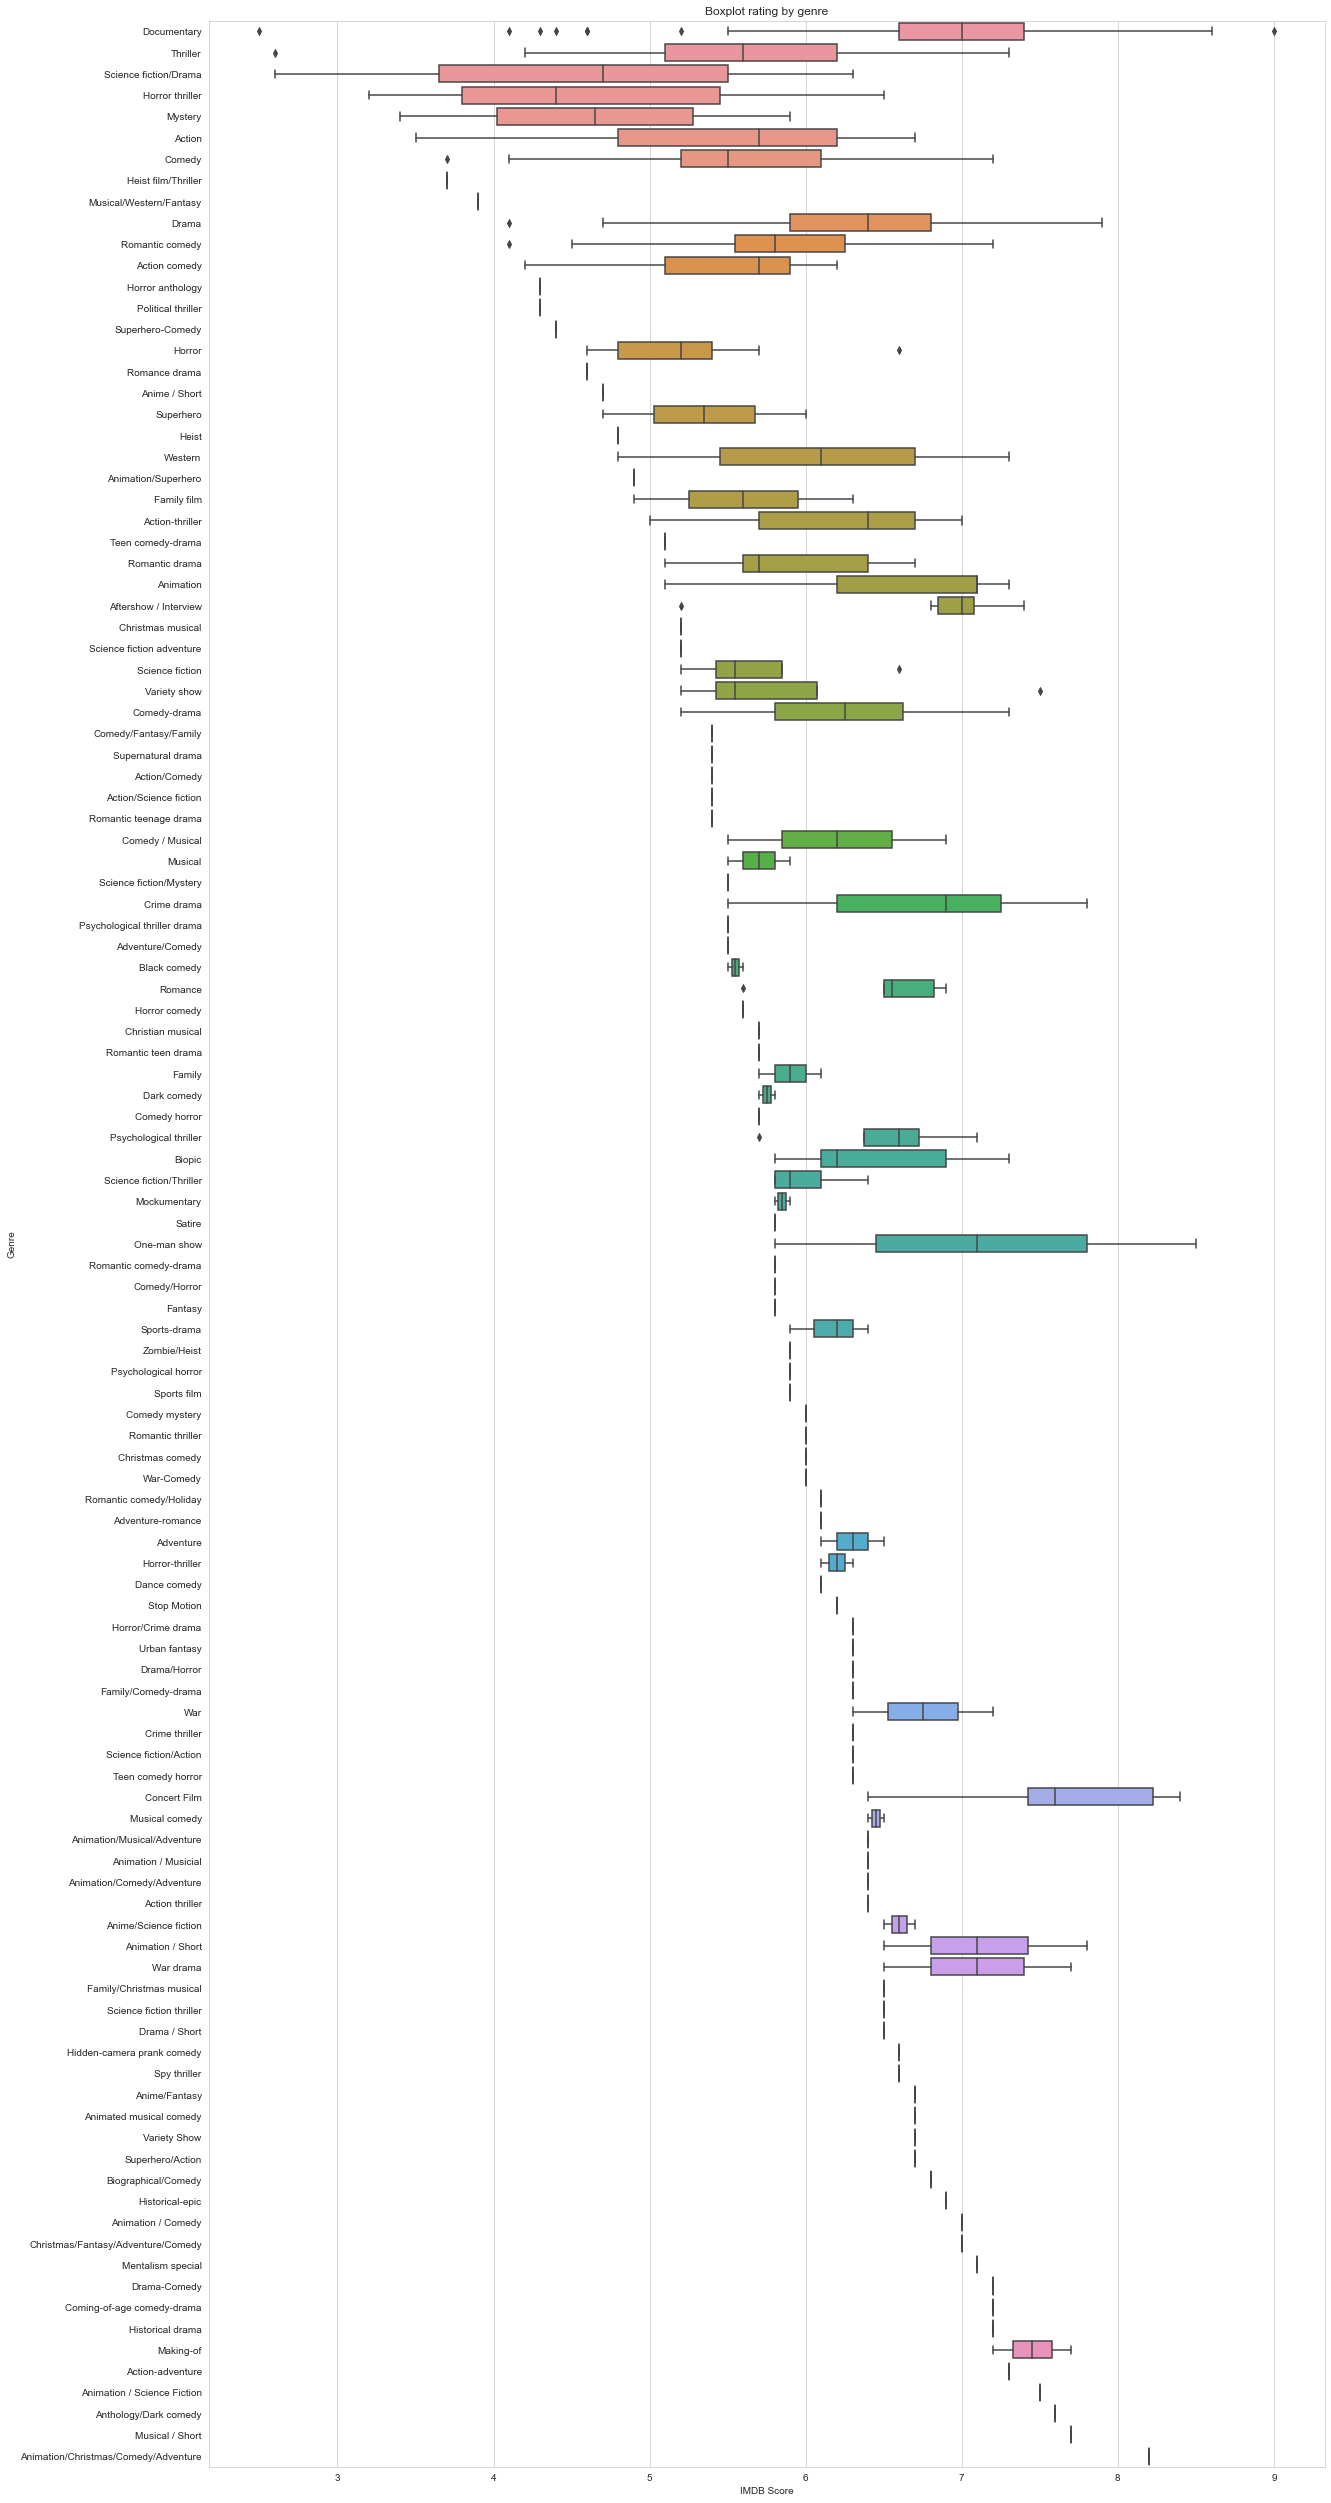

In [40]:
# The genres are very varied: we build a boxplot
sns.set_style("whitegrid")
sns.set_palette("rainbow")
plt.figure(figsize=(20, 45))
sns.boxplot(x='IMDB Score', y='Genre', data=df)
plt.title('Boxplot rating by genre')

- The films of "Concert film" (live stand-up) have more than 75% of the cases between 7.50 and 8.50)
- The "Documentaries" are another of the genres with the best score (75% of the cases are between 6.5 and 7.50) also having the maximum valuation of the entire dataset (9)
- Other categories, although with a great dispersion, with a relatively high value are "Drama", "Western", "Thriller" and "One-man show"
- The categories with the highest number of films with low rating are: "Science fiction / Drama", "Horror thriller", "Horror", "Mystery"

In [41]:
# Mean by category: worst 10's
df.groupby('Genre')['IMDB Score'].mean().sort_values().head(10)

Genre
Heist film/Thriller        3.700000
Musical/Western/Fantasy    3.900000
Horror anthology           4.300000
Political thriller         4.300000
Superhero-Comedy           4.400000
Science fiction/Drama      4.533333
Romance drama              4.600000
Mystery                    4.650000
Horror thriller            4.700000
Anime / Short              4.700000
Name: IMDB Score, dtype: float64

In [42]:
# Mean by category: best 10's
df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False).head(10)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Name: IMDB Score, dtype: float64

Some categories that appear in the "10 best" and "10 worst" rankings seem to be unusual categories.

In [43]:
# Unusual categories: maximum "3" films
unusual_categories = df.groupby("Genre").filter(lambda x: len(x) <= 3)
unusual_categories['Genre'].unique()

array(['Science fiction/Drama', 'Horror thriller', 'Mystery',
       'Heist film/Thriller', 'Musical/Western/Fantasy',
       'Horror anthology', 'Political thriller', 'Superhero-Comedy',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Christmas musical',
       'Science fiction adventure', 'Comedy/Fantasy/Family',
       'Supernatural drama', 'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Psychological thriller drama',
       'Adventure/Comedy', 'Black comedy', 'Horror comedy',
       'Christian musical', 'Romantic teen drama', 'Family',
       'Dark comedy', 'Comedy horror', 'Mockumentary', 'Satire',
       'One-man show', 'Romantic comedy-drama', 'Comedy/Horror',
       'Fantasy', 'Sports-drama', 'Zombie/Heist', 'Psychological horror',
       'Sports film', 'Comedy mystery

In [44]:
unusual_categories['IMDB Score'].mean()

6.01612903225807

- The average is approx. equal to the mean of the total dataset: it does not give us much extra information

In [45]:
# Unusual categories: a film
unusual_categories_1 = df.groupby("Genre").filter(lambda x: len(x) <= 1)
unusual_categories_1['Genre'].unique()

array(['Heist film/Thriller', 'Musical/Western/Fantasy',
       'Horror anthology', 'Political thriller', 'Superhero-Comedy',
       'Romance drama', 'Anime / Short', 'Heist', 'Animation/Superhero',
       'Teen comedy-drama', 'Christmas musical',
       'Science fiction adventure', 'Comedy/Fantasy/Family',
       'Supernatural drama', 'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Science fiction/Mystery',
       'Psychological thriller drama', 'Adventure/Comedy',
       'Horror comedy', 'Christian musical', 'Romantic teen drama',
       'Comedy horror', 'Romantic comedy-drama', 'Comedy/Horror',
       'Fantasy', 'Zombie/Heist', 'Psychological horror', 'Sports film',
       'Comedy mystery', 'Romantic thriller', 'Christmas comedy',
       'War-Comedy', 'Romantic comedy/Holiday', 'Adventure-romance',
       'Dance comedy', 'Stop Motion', 'Horror/Crime drama',
       'Urban fantasy', 'Drama/Horror', 'Family/Comedy-drama',
       'Crime thriller', 'Science f

In [46]:
unusual_categories_1['IMDB Score'].mean()

6.031428571428572

- The same happens for categories with only one film

In [47]:
unusual_categories_1['IMDB Score'].std()

0.9097766658804449

In [48]:
# Macrocategories: more than 3 films
Macrocategories = df.groupby("Genre").filter(lambda x: len(x) > 3)
Macrocategories['Genre'].unique()

array(['Documentary', 'Thriller', 'Action', 'Comedy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror', 'Romantic drama',
       'Animation', 'Aftershow / Interview', 'Science fiction',
       'Variety show', 'Comedy-drama', 'Crime drama', 'Romance',
       'Psychological thriller', 'Biopic', 'Science fiction/Thriller',
       'Concert Film', 'Animation / Short'], dtype=object)

In [49]:
Macrocategories['IMDB Score'].mean()

6.3406521739130435

In [65]:
macrocategorias['IMDB Score'].std()

0.9778943902043005

### 2. "Language" y "IMDB Score"

In [67]:
print("La cantidad de lenguajes es: ", len(df['Language'].unique()))

La cantidad de lenguajes es:  38


In [70]:
df['Language'].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
English/Spanish                 5
Turkish                         5
Dutch                           3
Marathi                         3
Polish                          3
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Hindi                   2
Thai                            2
English/Swedish                 1
Khmer/English/French            1
Spanish/Basque                  1
English/Korean                  1
Tamil                           1
Swedish                         1
Norwegian                       1
English/Taiwanese/Mandarin      1
English/Ukranian/Russian        1
Bengali       

Text(0.5, 1.0, 'Boxplot rating por lengua')

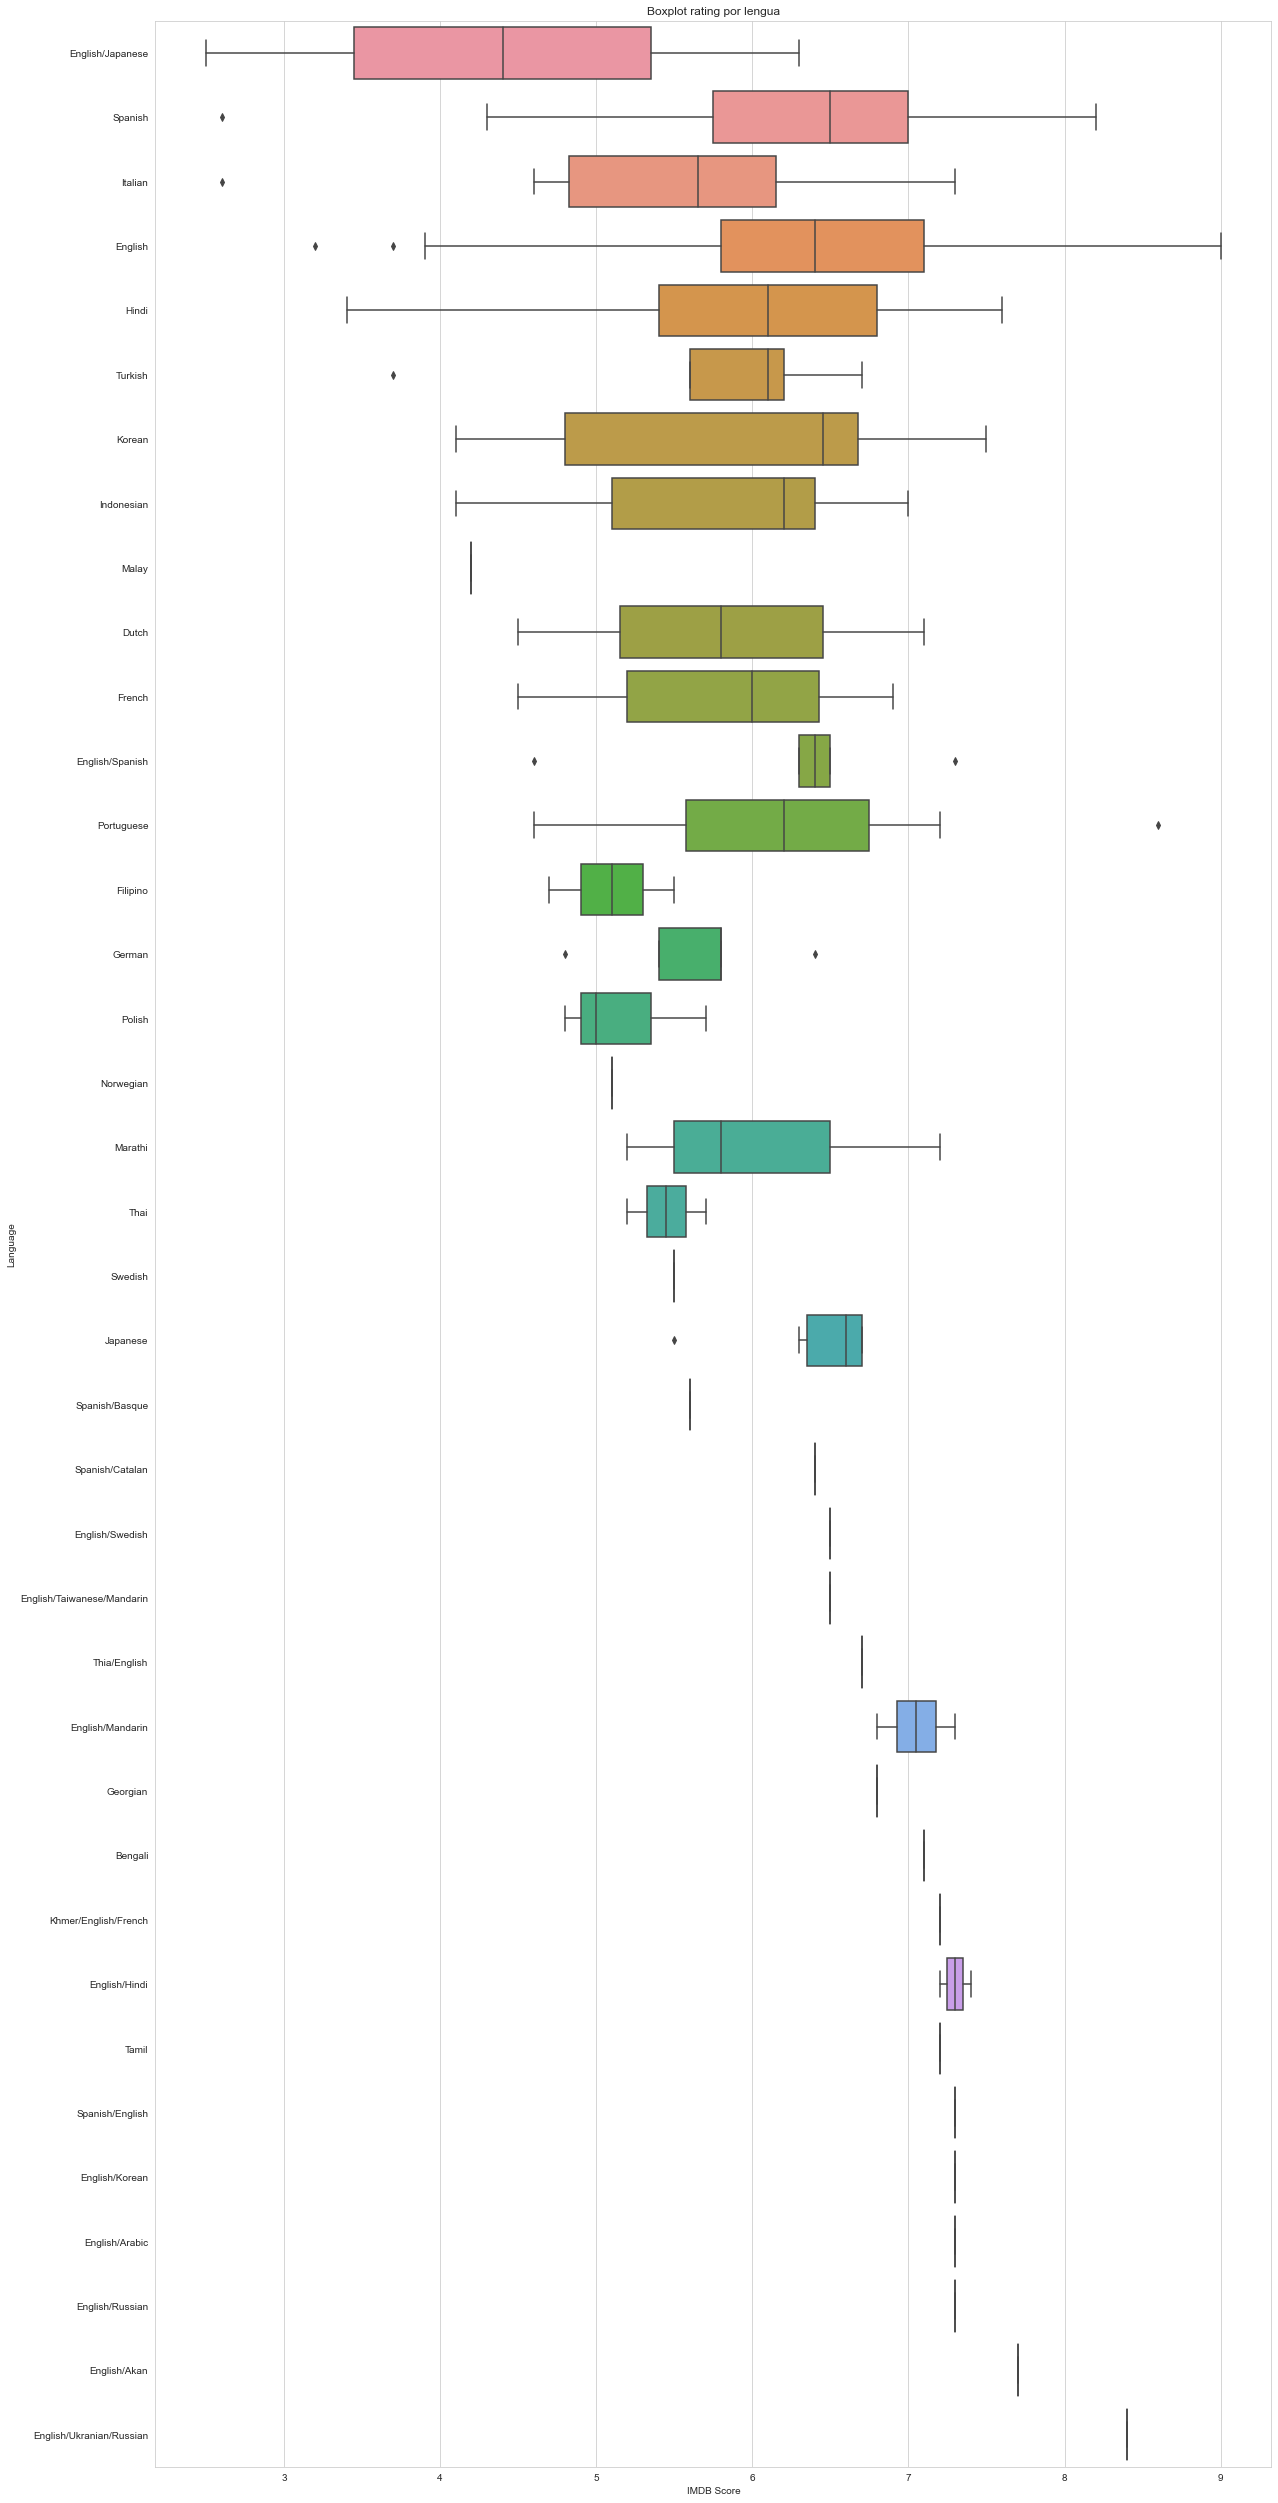

In [68]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(20, 45))
sns.boxplot(x='IMDB Score', y='Language', data=df)
plt.title('Boxplot rating por lengua')

- Las películas en lengua española e inglesa tienen la mayor cantidad de films con mejor valoración (películas de menos de 4 son extrañas)
- Las películas en lengua coreana poseen el 50% de los films con más de 6.50 de valoración (alta)
- Las películas en lengua holandesa, italiana y alemana presentan el 50% de los films con menos de 6 de valoración

In [73]:
# Idiomas inusuales: menos de 3 films
idiomas_inusuales = df.groupby("Language").filter(lambda x: len(x) <= 3)
idiomas_inusuales['Language'].unique()

array(['English/Japanese', 'Malay', 'Dutch', 'Filipino', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Spanish/Basque',
       'Spanish/Catalan', 'English/Swedish', 'English/Taiwanese/Mandarin',
       'Thia/English', 'English/Mandarin', 'Georgian', 'Bengali',
       'Khmer/English/French', 'English/Hindi', 'Tamil',
       'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [74]:
idiomas_inusuales['IMDB Score'].mean()

6.210810810810811

In [75]:
idiomas_inusuales['IMDB Score'].std()

1.2133021479013804

In [85]:
# Worst 10
df.groupby('Language')['IMDB Score'].mean().sort_values().head(10)

Language
Malay               4.200000
English/Japanese    4.400000
Norwegian           5.100000
Filipino            5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Name: IMDB Score, dtype: float64

### 3. "Year" y "IMDB Score"

Text(0.5, 1.0, 'Boxplot rating por año')

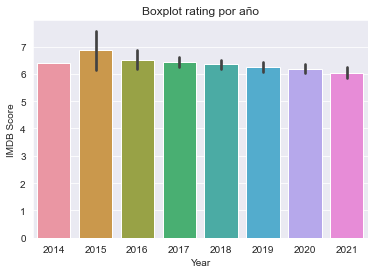

In [81]:
sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.barplot(x='Year', y='IMDB Score', data=df)
plt.title('Barplot rating por año')

- La distribución de rating por año es aprox. uniforme con un pico en el 2015 pero también con mayor variación

Text(0.5, 1.0, 'Boxplot rating por lengua')

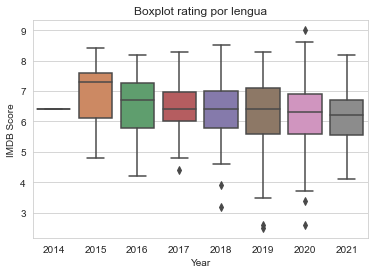

In [84]:
sns.set_style("whitegrid")
sns.set_palette("rainbow")
sns.boxplot(x='Year', y='IMDB Score', data=df)
plt.title('Boxplot rating por lengua')

- Las valoraciones extremadamente bajas comienzan a aparecer a partir del 2018

<AxesSubplot:xlabel='IMDB Score', ylabel='Followers'>

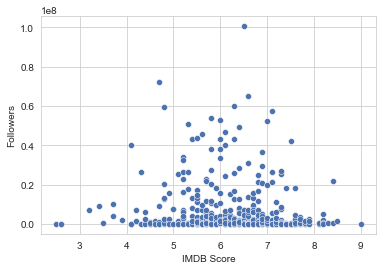

In [67]:
sns.scatterplot("IMDB Score", "Followers", data = df)